# <div style="text-align: center"> Horizontal & Vertical filters</div>
#### <div style="text-align: right"> 2019.09.19 Thursday </div>
#### <div style="text-align: right"> Prof. Changho Suh, TA Jaewoong Cho, Junhyung Ahn</div>

**실습목표**
- Image plotting
- Horizontal & Vertical filters 생성
- 주어진 image에 horizontal & vertical filters를 가지고 convolution 적용
- padding 사용법 익히기
- 각 filter가 적용된 image 관찰

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.datasets import load_sample_image

In [2]:
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower], dtype = np.float32)
batch_size, height, width, channels = images.shape

In [3]:
print(images.shape)

(2, 427, 640, 3)


In [4]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

In [5]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

In [6]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X: images})

In [7]:
output.shape

(2, 427, 640, 2)

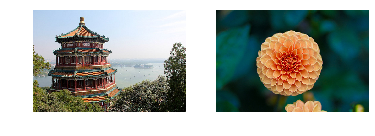

In [8]:
plt.subplot(1, 2, 1)
plot_image(china)
plt.subplot(1, 2, 2)
plot_image(flower)

plt.show()

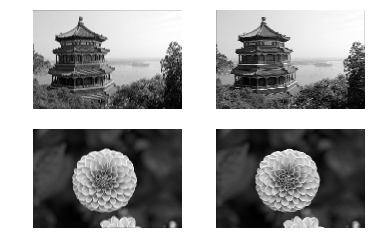

In [9]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(output[image_index, :, :, feature_map_index])
        
plt.show()

In [10]:
def crop(images):
    return images[150:220, 130:250]

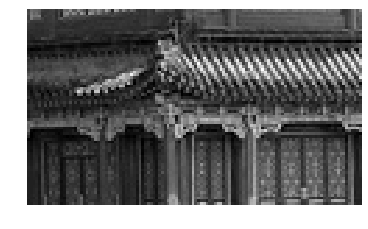

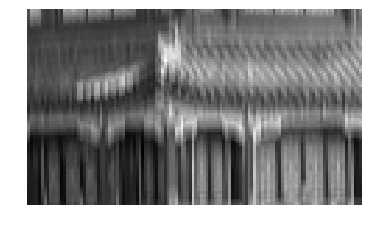

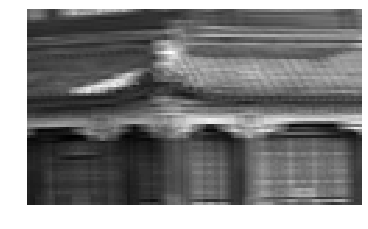

In [11]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index in (0,1):
    plot_image(crop(output[0, :, :, feature_map_index]))
    plt.show()